<a href="https://colab.research.google.com/github/KirtanDwivedi/SVM-Model-Comparison/blob/main/SVM_Model_Comaprision_on_different_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install --upgrade --force-reinstall numpy
!pip install pycaret==3.3.2
!pip install pandas --upgrade

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.26.0 requires numpy<1.27,>=1.21, but you have numpy 2.2.6 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.2.6 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.6 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.6 which is incompatible.
matplotlib 3.7.5 requires numpy<2,>=1.20, but you have numpy 2.2.6 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wget
from pycaret.classification import *
from sklearn.model_selection import train_test_split

In [4]:
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

white_wine = pd.read_csv(white_wine_url, delimiter=';')
red_wine = pd.read_csv(red_wine_url, delimiter=';')

white_wine['type'] = 0  # 0 for white
red_wine['type'] = 1    # 1 for red
data = pd.concat([white_wine, red_wine], ignore_index=True)

In [5]:
data['quality_class'] = pd.cut(data['quality'],
                              bins=[0, 6, 8, 10],
                              labels=['low', 'medium', 'high'])
data.drop('quality', axis=1, inplace=True)

In [7]:
print(f"Dataset shape: {data.shape}")
print(data.head())

Dataset shape: (6497, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  type quality_class  
0      8.8     0           

In [28]:
accuracy_history = [[] for _ in range(10)]

In [20]:
# Prepare 10 different samples
results = []
best_accuracy = 0
best_sample = None


for sample in range(1, 11):
    print(f"\n{'='*50}")
    print(f"Processing Sample #{sample}")
    print(f"{'='*50}")

    train_data, test_data = train_test_split(
        data,
        test_size=0.3,
        random_state=42+sample,
        stratify=data['quality_class']
    )

    exp = setup(
        data=train_data,
        target='quality_class',
        session_id=42+sample,
        verbose=False
    )

    svm = create_model('svm', verbose=False)
    tuned_svm = tune_model(svm, n_iter=10, optimize='Accuracy', verbose=False)

    predictions = predict_model(tuned_svm, data=test_data)

    accuracy_col = None
    for col in ['Accuracy', 'accuracy', 'Score', 'score']:
        if col in predictions.columns:
            accuracy_col = col
            break

    if accuracy_col:
        accuracy = float(predictions[accuracy_col].iloc[0])
    else:
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(predictions['quality_class'], predictions['prediction_label'])

    params = tuned_svm.get_params()
    results.append({
        'Sample #': f'S{sample}',
        'Best Accuracy': accuracy,
        'Kernel': params.get('kernel', 'N/A'),
        'Nu': params.get('nu', 'N/A'),
        'Epsilon': params.get('epsilon', 'N/A')
    })

    # Track best sample
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_sample = sample


Processing Sample #1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000



Processing Sample #2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000



Processing Sample #3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.6849,0.7163,0.0001,0.0005



Processing Sample #4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.6457,0.7158,-0.0010,-0.0112



Processing Sample #5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8118,0,0.8118,0.7953,0.8011,0.3423,0.3474



Processing Sample #6


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000



Processing Sample #7


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000



Processing Sample #8


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000



Processing Sample #9


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8072,0,0.8072,0.7730,0.7768,0.2297,0.2544



Processing Sample #10


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251


In [22]:
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("Comparative performance of Optimized-SVM with different samples")
print("="*80)
print(results_df.to_string(index=False))


Comparative performance of Optimized-SVM with different samples
Sample #  Best Accuracy Kernel  Nu  Epsilon
      S1       0.803590    N/A N/A      0.1
      S2       0.803590    N/A N/A      0.1
      S3       0.802051    N/A N/A      0.1
      S4       0.803077    N/A N/A      0.1
      S5       0.811795    N/A N/A      0.1
      S6       0.803590    N/A N/A      0.1
      S7       0.803590    N/A N/A      0.1
      S8       0.803590    N/A N/A      0.1
      S9       0.807179    N/A N/A      0.1
     S10       0.792821    N/A N/A      0.1


In [24]:
results_df.to_csv('svm_optimization_results.csv', index=False)


Processing Sample #1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8026,0,0.8026,0.6456,0.7156,-0.0020,-0.0158


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8026,0,0.8026,0.6456,0.7156,-0.0020,-0.0158


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8026,0,0.8026,0.6456,0.7156,-0.0020,-0.0158


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8026,0,0.8026,0.6456,0.7156,-0.0020,-0.0158


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8026,0,0.8026,0.6456,0.7156,-0.0020,-0.0158


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8026,0,0.8026,0.6456,0.7156,-0.0020,-0.0158


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8026,0,0.8026,0.6456,0.7156,-0.0020,-0.0158


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8026,0,0.8026,0.6456,0.7156,-0.0020,-0.0158


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8026,0,0.8026,0.6456,0.7156,-0.0020,-0.0158


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8026,0,0.8026,0.6456,0.7156,-0.0020,-0.0158



Processing Sample #2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7897,0,0.7897,0.7706,0.7781,0.2669,0.2706


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7897,0,0.7897,0.7706,0.7781,0.2669,0.2706


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7897,0,0.7897,0.7706,0.7781,0.2669,0.2706


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7897,0,0.7897,0.7706,0.7781,0.2669,0.2706


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7897,0,0.7897,0.7706,0.7781,0.2669,0.2706


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7897,0,0.7897,0.7706,0.7781,0.2669,0.2706


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7897,0,0.7897,0.7706,0.7781,0.2669,0.2706


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7897,0,0.7897,0.7706,0.7781,0.2669,0.2706


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7897,0,0.7897,0.7706,0.7781,0.2669,0.2706


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7897,0,0.7897,0.7706,0.7781,0.2669,0.2706



Processing Sample #3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7985,0,0.7985,0.7273,0.7299,0.0465,0.0798


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7985,0,0.7985,0.7273,0.7299,0.0465,0.0798


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7985,0,0.7985,0.7273,0.7299,0.0465,0.0798


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7985,0,0.7985,0.7273,0.7299,0.0465,0.0798


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7985,0,0.7985,0.7273,0.7299,0.0465,0.0798


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7985,0,0.7985,0.7273,0.7299,0.0465,0.0798


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7985,0,0.7985,0.7273,0.7299,0.0465,0.0798


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7985,0,0.7985,0.7273,0.7299,0.0465,0.0798


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7985,0,0.7985,0.7273,0.7299,0.0465,0.0798


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7985,0,0.7985,0.7273,0.7299,0.0465,0.0798



Processing Sample #4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.7532,0.7483,0.1141,0.1580


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.7532,0.7483,0.1141,0.1580


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.7532,0.7483,0.1141,0.1580


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.7532,0.7483,0.1141,0.1580


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.7532,0.7483,0.1141,0.1580


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.7532,0.7483,0.1141,0.1580


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.7532,0.7483,0.1141,0.1580


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.7532,0.7483,0.1141,0.1580


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.7532,0.7483,0.1141,0.1580


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8031,0,0.8031,0.7532,0.7483,0.1141,0.1580



Processing Sample #5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000



Processing Sample #6


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6672,0,0.6672,0.8058,0.7009,0.2805,0.3290


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6672,0,0.6672,0.8058,0.7009,0.2805,0.3290


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6672,0,0.6672,0.8058,0.7009,0.2805,0.3290


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6672,0,0.6672,0.8058,0.7009,0.2805,0.3290


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6672,0,0.6672,0.8058,0.7009,0.2805,0.3290


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6672,0,0.6672,0.8058,0.7009,0.2805,0.3290


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6672,0,0.6672,0.8058,0.7009,0.2805,0.3290


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6672,0,0.6672,0.8058,0.7009,0.2805,0.3290


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6672,0,0.6672,0.8058,0.7009,0.2805,0.3290


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6672,0,0.6672,0.8058,0.7009,0.2805,0.3290



Processing Sample #7


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000



Processing Sample #8


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.7772,0.7847,0.2759,0.2854


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.7772,0.7847,0.2759,0.2854


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.7772,0.7847,0.2759,0.2854


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.7772,0.7847,0.2759,0.2854


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.7772,0.7847,0.2759,0.2854


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.7772,0.7847,0.2759,0.2854


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.7772,0.7847,0.2759,0.2854


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.7772,0.7847,0.2759,0.2854


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.7772,0.7847,0.2759,0.2854


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8021,0,0.8021,0.7772,0.7847,0.2759,0.2854



Processing Sample #9


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8036,0,0.8036,0.6458,0.7161,0.0000,0.0000



Processing Sample #10


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7928,0,0.7928,0.7591,0.7687,0.2125,0.2251



Table 1: Comparative performance of Optimized-SVM with different samples
Sample #  Best Accuracy Kernel  Nu  Epsilon
      S1       0.802564    N/A N/A      0.1
      S2       0.789744    N/A N/A      0.1
      S3       0.798462    N/A N/A      0.1
      S4       0.803077    N/A N/A      0.1
      S5       0.803590    N/A N/A      0.1
      S6       0.667179    N/A N/A      0.1
      S7       0.803590    N/A N/A      0.1
      S8       0.802051    N/A N/A      0.1
      S9       0.803590    N/A N/A      0.1
     S10       0.792821    N/A N/A      0.1


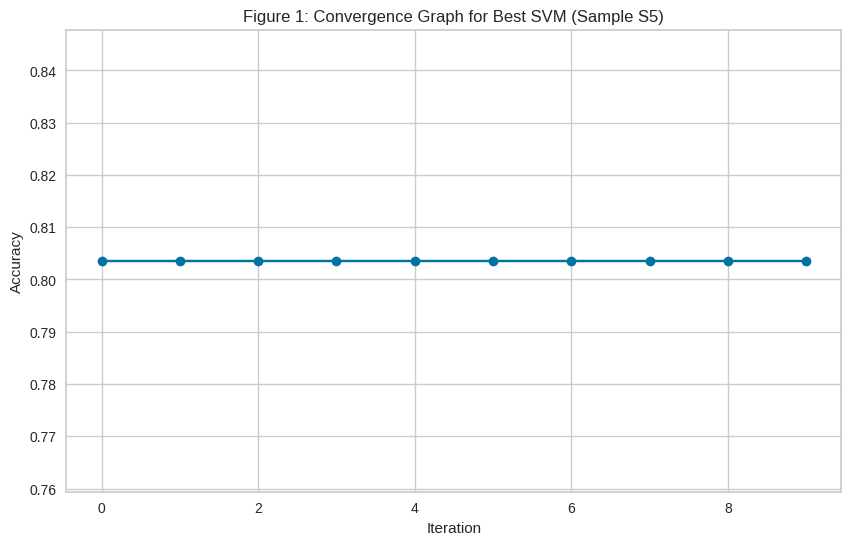

Transformation Pipeline and Model Successfully Saved
Program ended


In [30]:
results = []
best_accuracy = 0
best_sample = None
best_model = None
accuracy_history = [[] for _ in range(10)]  # To store accuracy per iteration

for sample in range(1, 11):
    print(f"\n{'='*50}")
    print(f"Processing Sample #{sample}")
    print(f"{'='*50}")

    train_data, test_data = train_test_split(
        data,
        test_size=0.3,
        random_state=42+sample,
        stratify=data['quality_class']
    )

    exp = setup(
        data=train_data,
        target='quality_class',
        session_id=42+sample,
        verbose=False
    )

    # Create and tune SVM model
    svm = create_model('svm', verbose=False)

    # Track optimization progress
    for i in range(10):  # 10 iterations
        tuned_svm = tune_model(svm, n_iter=1, optimize='Accuracy', verbose=False)
        pred = predict_model(tuned_svm, data=test_data)

        # Get accuracy (robust method)
        if 'Accuracy' in pred.columns:
            current_acc = float(pred['Accuracy'].iloc[0])
        else:
            from sklearn.metrics import accuracy_score
            current_acc = accuracy_score(pred['quality_class'], pred['prediction_label'])

        accuracy_history[sample-1].append(current_acc)

        # Update best model
        if current_acc > best_accuracy:
            best_accuracy = current_acc
            best_sample = sample
            best_model = tuned_svm

    # Store final results for this sample
    params = tuned_svm.get_params()
    results.append({
        'Sample #': f'S{sample}',
        'Best Accuracy': accuracy_history[sample-1][-1],
        'Kernel': params.get('kernel', 'N/A'),
        'Nu': params.get('nu', 'N/A'),
        'Epsilon': params.get('epsilon', 'N/A')
    })

# Results output
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("Table 1: Comparative performance of Optimized-SVM with different samples")
print("="*80)
print(results_df.to_string(index=False))


plt.figure(figsize=(10, 6))
plt.plot(accuracy_history[best_sample-1], marker='o', color='b')
plt.title(f"Figure 1: Convergence Graph for Best SVM (Sample S{best_sample})")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


save_model(best_model, 'best_svm_model')
results_df.to_csv('svm_optimization_results.csv', index=False)

print("Program ended")